<a href="https://colab.research.google.com/github/pkoneill/VisualizingBrainWaves/blob/main/Visualizing_Brain_Waves_EEG_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background
It's time to put everything that we've learned today together! You'll be working with data collected just yesterday from a 2-channel EEG (the one you saw in the live demo). We made this EEG using this [Instructables](https://www.instructables.com/DIY-EEG-and-ECG-Circuit/) and you can too!

<img src='https://github.com/pkoneill/VisualizingBrainWaves/blob/main/EEGs v1 v2.png?raw=1' width=400px>


# Objectives

In this tutorial, you will learn how to import data files that contain EEG signals collected from a human subject when:


*   Subject's eyes are open and they are watching Youtube videos (9 trials)

*   Subject's eyes are closed and they're practicing meditation (9 trials)

But the labels 'open' or 'closed' were lost in an unfortunate reboot incident :}! Your goal is to determine which of the trials correspond to each state (some are perhaps indistinguishable). 



## Imports and helper functions
We'll  begin by importing some Python packages needed for this session. Please execute the cells below to initialize the notebook environment.


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

In [60]:
#@title Figure Settings
%config InlineBackend.figure_format = 'retina'

plt.style.use("https://raw.githubusercontent.com/pkoneill/VisualizingBrainWaves/master/mplsettings")

def setup_graph(title='', x_label='', y_label='', fig_size=None):

    # Set DPI >=150 for readability and adjust figsize
    fig = plt.figure( figsize=(3,1.5), dpi=150 )

    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1], dpi=150)
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout() # To ensure everything fits

---
## Import the data

In [3]:
#Import data into a table (manually)
data0 = pd.read_csv('https://raw.githubusercontent.com/pkoneill/VisualizingBrainWaves/main/EEG%20Data/Data0.csv',header=None).iloc[:,1].values
data6 = pd.read_csv('https://raw.githubusercontent.com/pkoneill/VisualizingBrainWaves/main/EEG%20Data/Data6.csv',header=None).iloc[:,1].values
data11 = pd.read_csv('https://raw.githubusercontent.com/pkoneill/VisualizingBrainWaves/main/EEG%20Data/Data11.csv',header=None).iloc[:,1].values
data17 = pd.read_csv('https://raw.githubusercontent.com/pkoneill/VisualizingBrainWaves/main/EEG%20Data/Data17.csv',header=None).iloc[:,1].values

In [4]:
#Import data into a table (loop, readable)
Nsamples = 18
all_data = list()
for i in range( Nsamples ):
  all_data.append( pd.read_csv(f'https://raw.githubusercontent.com/pkoneill/VisualizingBrainWaves/main/EEG%20Data/Data{i}.csv',header=None).iloc[:,1].values )

In [5]:
#Import data into a table (Pythonic, using a list comprehension)
all_data = [ pd.read_csv(f'https://raw.githubusercontent.com/pkoneill/VisualizingBrainWaves/main/EEG%20Data/Data{i}.csv',header=None).iloc[:,1].values for i in range( Nsamples ) ]

In [7]:
# Custom EEG FFT function #
def eegfft( input ):
  fft_output = np.fft.rfft( input )
  magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]
  
  return magnitude

## Apply the fourier transform 

(0.0, 60.0)

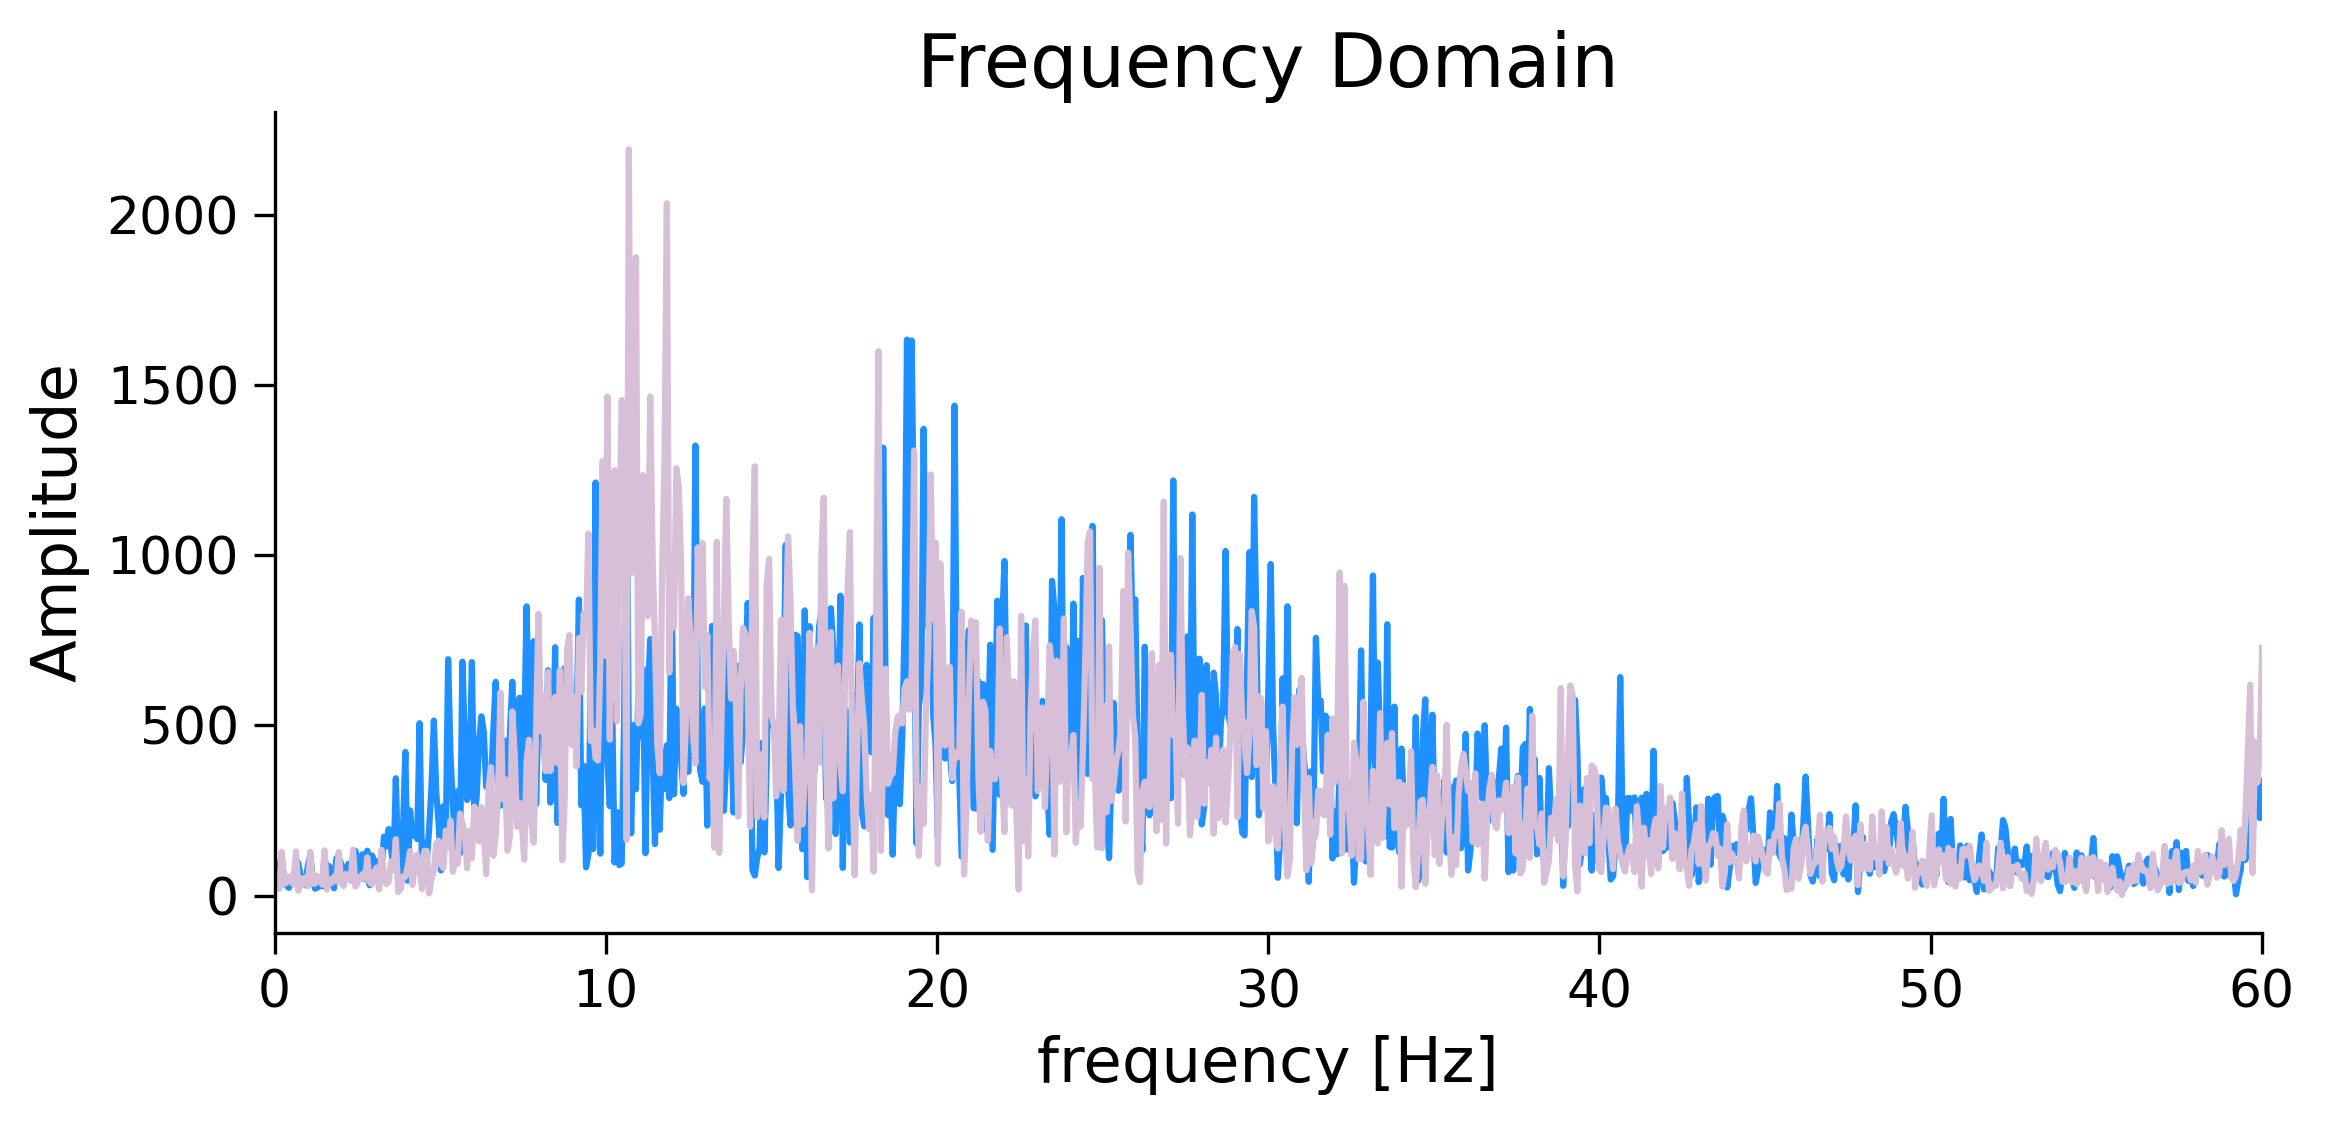

In [10]:
setup_graph(x_label='frequency [Hz]', y_label='Amplitude', 
            title='Frequency Domain', fig_size=(8,4))

numSamples = len( data0 )
sRate = 44100

frequencies = [(i*1.0/numSamples)*sRate for i in range(numSamples//2+1)]

sample = 0
magnitude = eegfft( all_data[0] )
plt.plot(frequencies, magnitude, 'dodgerblue')

magnitude = eegfft( all_data[13] )
plt.plot(frequencies, magnitude, 'thistle')

plt.xlim(0, 60)

In [11]:
all_data_fft = [ eegfft( this_dataset )[0:600] for this_dataset in all_data ]

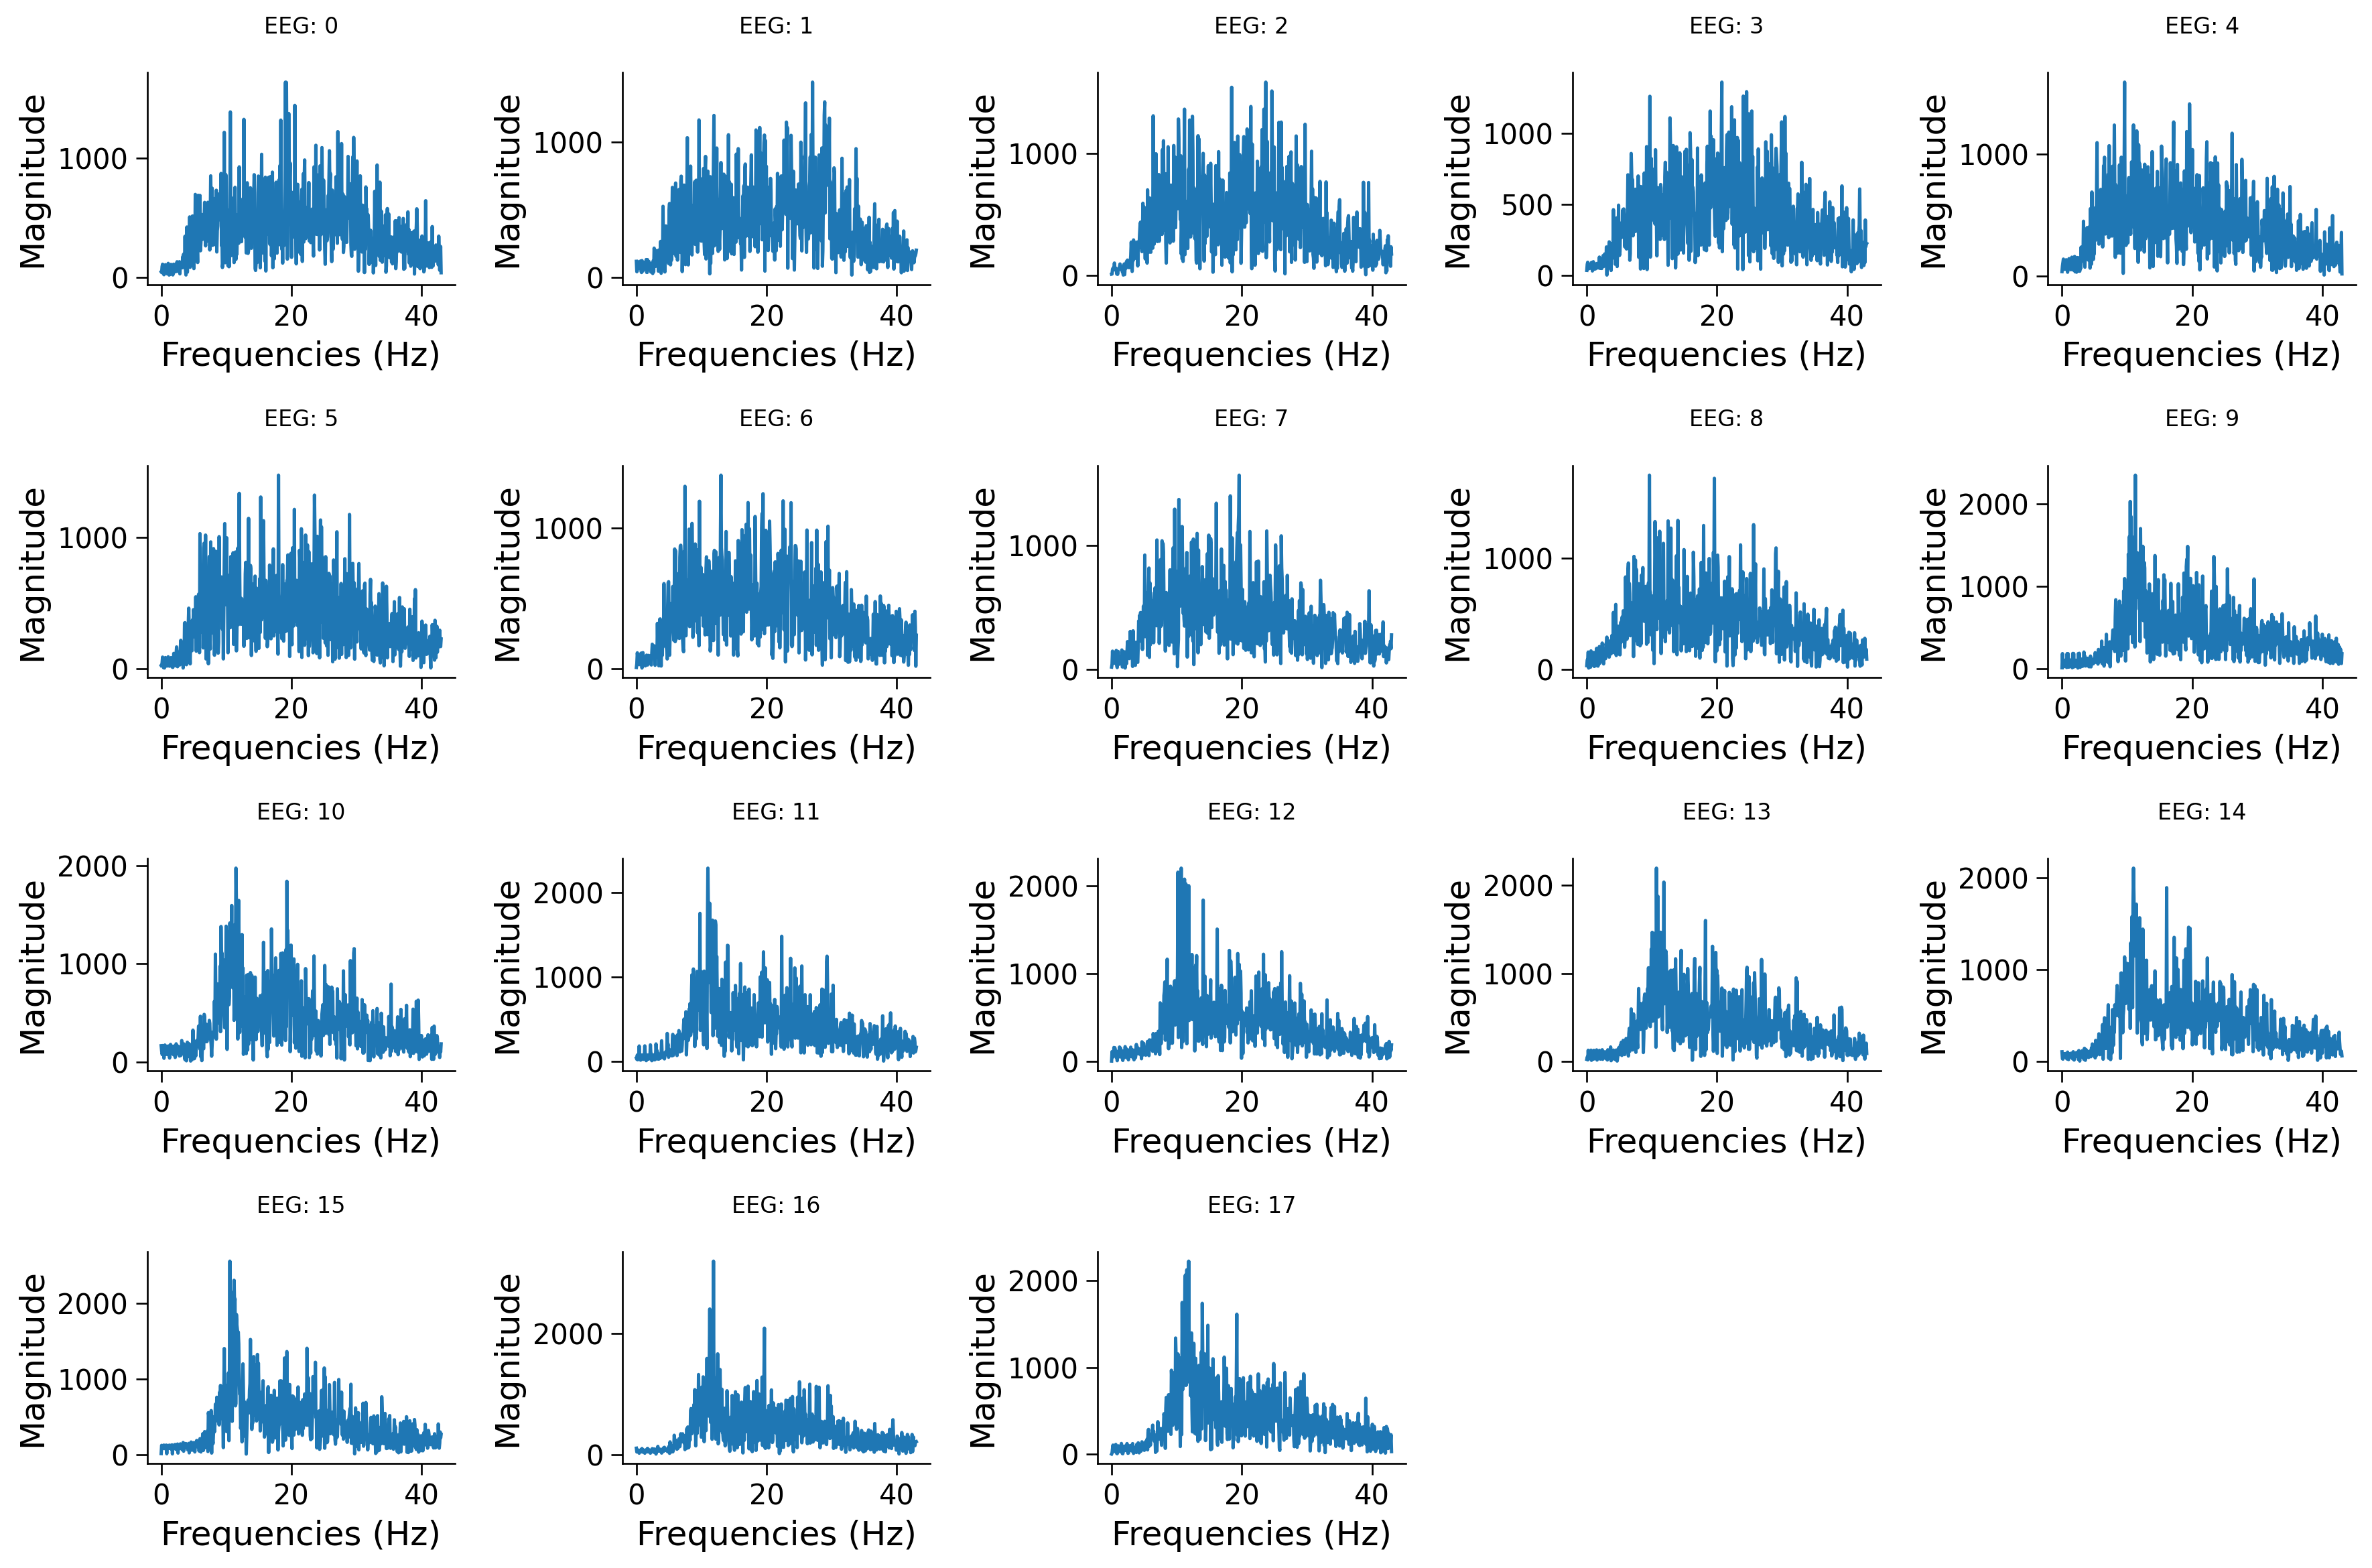

In [12]:
plt.figure(figsize=(15,10),dpi=120)
subset_frequencies = frequencies[0:600]

for index, this_fft in enumerate(all_data_fft):
    plt.subplot(4, 5, index + 1)
    plt.plot(subset_frequencies, this_fft)
    plt.xlabel('Frequencies (Hz)')
    plt.ylabel('Magnitude')
    plt.title('EEG: %i\n' % index, fontsize = 10)

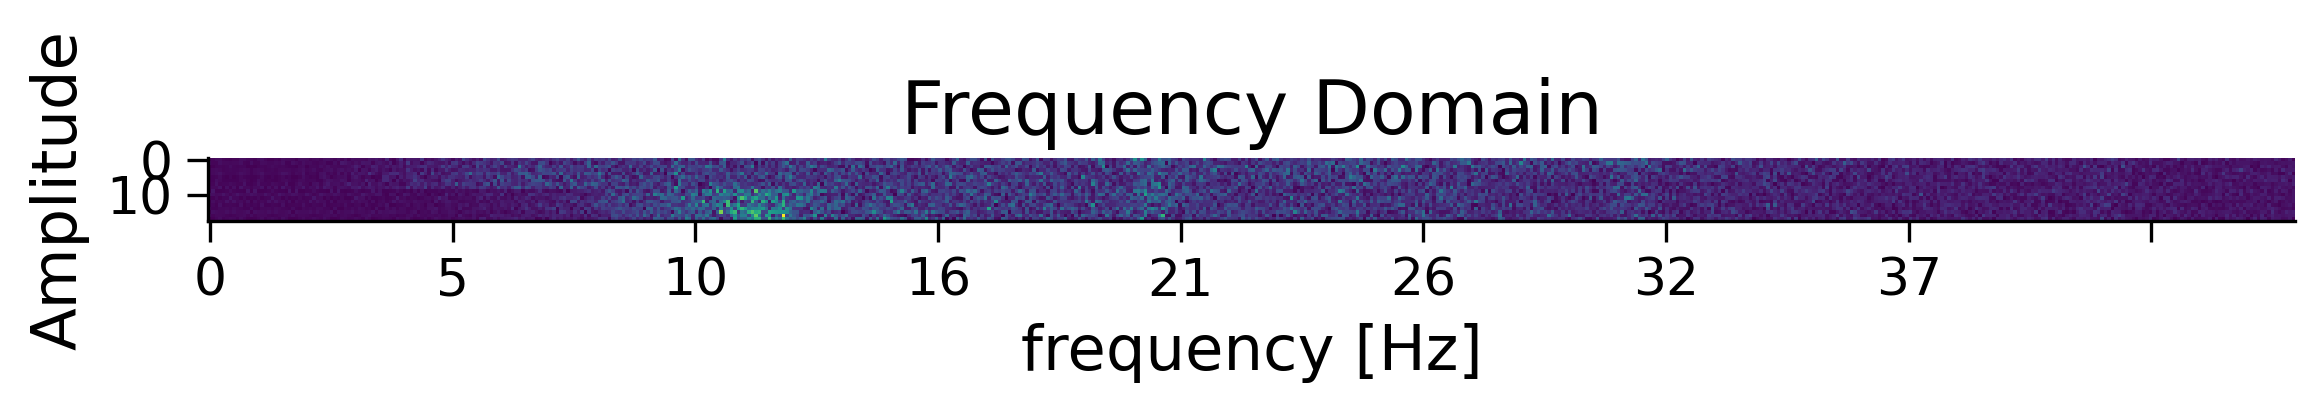

In [59]:
all_data_fft_matrix = np.vstack( all_data_fft )

setup_graph(x_label='frequency [Hz]', y_label='Amplitude', 
            title='Frequency Domain', fig_size=(8,12))
plt.imshow( all_data_fft_matrix )

# X Axis labels #
indx = [ np.int(x) for x in np.arange(0, len(subset_frequencies), len(subset_frequencies)/8 ) ]
indx = np.array(indx)
indx = [ np.int(x) for x in np.arange(0, len(subset_frequencies), len(subset_frequencies)/8 ) ]
xlbls = [ np.int(subset_frequencies[x]) for x in indx ]

plt.xticks( np.arange(0, len(subset_frequencies), 5*len(subset_frequencies)/max(subset_frequencies) ), labels=xlbls );